In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

In [5]:
def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

# Data Processing

Read in the data from the file arr_data_edit.csv. Following this, we will carry out some data processing steps.<br><br>
To answer the homework questions, you may wish to add in some code cells.<br><br>
<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 1 and 2 based on this section</span>

In [6]:
part_one = pd.read_csv('data-Copy2/arr_data_edit2.csv')#read in file

In [7]:
part_one.head()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,1
4,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,84.0,14


Find the number of unique values and how often they occur for the variable `arrhythmia`.<br><br>
<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [8]:
part_one.arrhythmia.nunique()

12

We are going to do a bit of processing. First look at how many observations are missing by column in the data frame.<br><br>
<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [9]:
part_one.isnull().sum()

Age           0
Sex           0
Height        0
Weight        0
QRS           0
PR            0
QT            0
T_wave        0
P_wave        0
QRS_angle     0
T_angle       8
P_angle       0
QRST_angle    0
Heart_Rate    0
arrhythmia    0
dtype: int64

We will first locate any observations missing a value for T_angle. Then, we will create a second data frame that excludes these observations. This is already done for you. Your job here is to keep track of the all of the different variable names.

In [10]:
missing_T = part_one[part_one['T_angle'].isnull()]
missing_T

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia
63,54,1,160,63,82,158,410,141,87,25,NaN,62.0,39.0,54.0,2
88,64,1,155,88,82,194,342,138,126,-4,NaN,64.0,-1.0,85.0,4
190,70,1,160,90,76,187,396,155,121,-1,NaN,30.0,2.0,89.0,2
201,63,0,174,79,91,151,410,198,86,16,NaN,2.0,16.0,59.0,2
225,56,0,170,80,81,162,352,154,100,23,NaN,56.0,20.0,79.0,1
337,62,1,157,65,81,174,452,160,116,53,NaN,42.0,53.0,87.0,2
349,48,0,182,77,77,196,325,235,104,46,NaN,56.0,44.0,89.0,2
389,41,0,170,67,96,191,368,202,108,62,NaN,-52.0,62.0,63.0,16


In [11]:
part_one = part_one[part_one['T_angle'].notnull()].reset_index(drop = True)

We are also going to create a second data frame to use later. We will call it part two. Notice that there is a column in the original data frame called 'arrhythmia' - it has many possible values. We are going to create a  dichotomous variable with only two outcomes from this. The 0 outcome indicates no arrhythmia. The 1 outcome indicates an arrhythmia.

In [12]:
part_two = part_one.copy()
part_two['dicot'] = part_two['arrhythmia'].apply(lambda x: 0 if x==1 else 1)

In [13]:
########################### Q1 ###############################################################
# How many observations are in the Data Frame AFTER we drop those with missing values for T_angle?

print(part_one.shape[0])
print(len(part_one))

# 420 #

## You can see from above that there is 420 observations after we drop those with missing values for T_angle

420
420


In [14]:
########################### Q2 ###############################################################
# How many unique values are there for the variable arrhythmia in the original data?

print(part_one.arrhythmia.unique())
print(part_one.arrhythmia.nunique())

# 12 #

## The code above returns the unique values for the variable arrhythmia in the original data

[ 8  6 10  1 14  3 16  2  4  5  9  7]
12


# Regression section

In [15]:
#Drop categorical variable before we start, we won't need it in this analysis
part_one.drop(columns = ['arrhythmia'], inplace= True)

### Exploratory Data Analysis

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 3,4,5 and 6 based on this section</span>

In this section, we are going to perform regression in order to predict the missing values of T_angle. This means, for this part of the assignment the <b>target</b> is <b>T_angle</b>. First, we will take a look at the data and calculate some descriptive statistics. 

<Axes: >

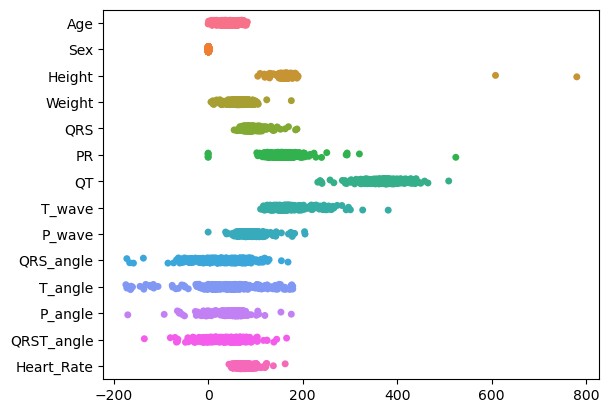

In [16]:
#Create a stripplot of the data 
sns.stripplot(data = part_one, orient = 'h')

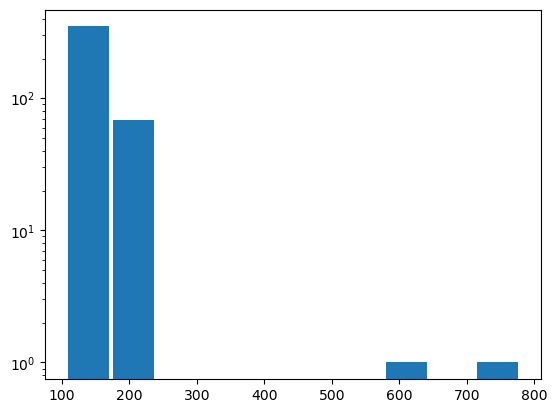

In [17]:
#Create a histogram for Height
part_one['Height'].hist(rwidth = 0.9)
plt.yscale('log')
plt.grid(None)

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [18]:
part_one[part_one['Height'] > 251]

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate
132,1,1,780,6,85,165,237,150,106,88,30.0,30.0,52.0,138.0
289,0,0,608,10,83,126,232,128,60,125,21.0,-50.0,102.0,163.0


In [19]:
part_one[part_one['Height'] > 180]

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0
67,37,0,182,90,101,294,356,164,143,33,19.0,34.0,26.0,69.0
90,55,0,185,105,87,292,406,192,175,19,58.0,18.0,51.0,64.0
102,50,0,184,96,94,160,360,203,89,26,143.0,36.0,55.0,68.0
118,58,0,186,18,87,166,372,150,96,-1,63.0,39.0,17.0,70.0
119,61,0,185,95,95,197,340,139,132,39,60.0,64.0,48.0,80.0
132,1,1,780,6,85,165,237,150,106,88,30.0,30.0,52.0,138.0
289,0,0,608,10,83,126,232,128,60,125,21.0,-50.0,102.0,163.0
305,42,0,188,91,113,213,358,220,107,91,39.0,84.0,79.0,78.0
319,20,0,186,66,95,123,378,161,81,58,18.0,67.0,43.0,57.0


In [20]:
#Subset the data so that it only contains valid height observations
#Choose a cutoff

part_one_new = part_one[part_one['Height'] <= 251]
part_one_new[part_one['Height'] > 251]

/tmp/ipykernel_677/1880968418.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  part_one_new[part_one['Height'] > 251]


,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate


<span style='color:red; font-weight:bold;font-size:1.5em'>MAKE NOTE: from this point forward in the regression section, you will be using part_one_new</span>
<br><br>
<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [21]:
#Calculate descriptive statistics T_angle
part_one_new['T_angle'].describe()

count    418.000000
mean      38.600478
std       55.320394
min     -174.000000
25%       15.000000
50%       42.000000
75%       63.750000
max      179.000000
Name: T_angle, dtype: float64

In [22]:
print(part_one_new['T_angle'].mean())
print(part_one_new['T_angle'].median())

38.600478468899524
42.0


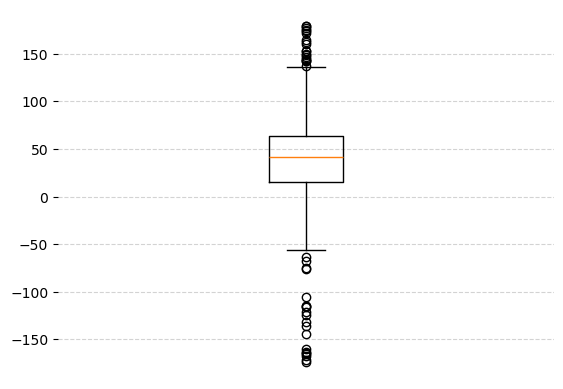

In [23]:
#Make a box plot
plt.boxplot(part_one_new['T_angle'])
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.grid(axis = 'y', linestyle = '--', color = 'lightgrey')
plt.xticks([])
plt.show()

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [24]:
#Calculate correlation coefficients between all variables and the target
#HINT: It's easier just to calculate the whole matrix...DON'T use the heatmap

part_one_new.corr()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate
Age,1.000000,-0.054988,0.253286,0.354665,-0.012714,0.089677,0.163742,0.024731,0.122495,-0.246760,0.036700,-0.072029,-0.271902,-0.151508
Sex,-0.054988,1.000000,-0.449560,-0.270241,-0.332866,-0.074488,0.091078,-0.192313,-0.112610,0.079241,-0.134277,-0.006607,0.039639,0.037299
Height,0.253286,-0.449560,1.000000,0.588857,0.043391,0.124939,0.061364,0.033560,0.189558,-0.136905,0.049124,0.039195,-0.146988,-0.205480
Weight,0.354665,-0.270241,0.588857,1.000000,0.100145,0.175188,0.101160,0.127405,0.193173,-0.176234,-0.014672,-0.060866,-0.225524,-0.138140
QRS,-0.012714,-0.332866,0.043391,0.100145,1.000000,0.040236,0.238733,0.405269,0.083197,-0.154748,0.033615,0.041241,-0.074211,0.020999
PR,0.089677,-0.074488,0.124939,0.175188,0.040236,1.000000,0.029534,0.037520,0.574543,0.005342,0.009497,-0.035662,0.040412,-0.006440
QT,0.163742,0.091078,0.061364,0.101160,0.238733,0.029534,1.000000,0.193684,0.004053,0.006207,0.101883,-0.144111,-0.070123,-0.626233
T_wave,0.024731,-0.192313,0.033560,0.127405,0.405269,0.037520,0.193684,1.000000,0.037966,-0.100385,0.045209,-0.120222,-0.111032,0.037810
P_wave,0.122495,-0.112610,0.189558,0.193173,0.083197,0.574543,0.004053,0.037966,1.000000,-0.024683,0.045377,0.033699,-0.054435,0.126696
QRS_angle,-0.246760,0.079241,-0.136905,-0.176234,-0.154748,0.005342,0.006207,-0.100385,-0.024683,1.000000,-0.037768,0.077738,0.700363,-0.041181


In [25]:
########################### Q3 ###############################################################

# The target for the regression part of this assignment is 

# T_angle #

## We are using this variable

# There are 

# 13 #

# features for the regression part of this assignment

## We have 13 variables that are not the target in the part_one_new data set

In [26]:
########################### Q4 ###############################################################

# You should see in both the strip chart and the histogram that there are anomalous 
# (this means unusual and most likely erroneous) observations for height that do not make practical sense. 
# We will remove these from our analysis. Based on what you see, and perhaps additional statistics 
# you might calculate, which statement applies?

		
# False # All of the anomalous values for height have exactly the same value (i.e. they are all the same height)
## They are 780 and 608


# False # There are a total of 20 anomalous heights in the data set
## There are 2

		
# True # There are two anomalous observations for height and both meet the formal definition for being outliers


# False # While the anomalous height values are unusual for height, they are typical of the values of P_wave 
# in our data (this means they would be totally normal values for P_wave, they just aren't for height)
## These values would also be outliers for P_wave

In [27]:
########################### Q5 ###############################################################
# Instead of creating a regression model to impute the missing value of T_angle, 
# we could just use a measure of central tendency (e.g. the mean). 
# Calculate descriptive statistics for T_angle where indicated in the notebook 
# (after removing the anomalous height observations). Run the code given to make a boxplot. 
# Based on the descriptive statistics and the boxplot, select the options below that apply.

In [28]:
# True # The mean is less than the median

print(part_one_new['T_angle'].mean())
print(part_one_new['T_angle'].median())

38.600478468899524
42.0


In [29]:
# False # Since the data is skewed, the most appropriate measure of spread to report 
# (and hence to use to estimate an unknown value) would be the mode

## It is rather the median. The mode is useful for catagorical data. "Mode is most useful as a measure of 
## central tendency when examining categorical data, such as models of cars or flavors of soda, for which 
## a mathematical average median value based on ordering can not be calculated."		

In [30]:
# False # The lower bound for outliers (i.e. anything below this value is an outlier) is -33.75

print(part_one_new['T_angle'].describe())
print("The IQR is", ((63.750000 - 15.000000) * 1.5))
print("The lower bound is", 38.600478 - 73.125)

## The lower bound seems to be -34.524522. 

count    418.000000
mean      38.600478
std       55.320394
min     -174.000000
25%       15.000000
50%       42.000000
75%       63.750000
max      179.000000
Name: T_angle, dtype: float64
The IQR is 73.125
The lower bound is -34.524522


In [31]:
# True # There are negative angles in the data, but negative angles do exist mathematically, 
# so this is fine (look this up if you don't know!)

## "Angle measure can be positive or negative, depending on the direction of rotation. 
## The angle measure is the amount of rotation between the two rays forming the angle."
## This negative angle business is just the angles rotating the other direction

In [32]:
# True # The IQR for this data is 48.75

print("The IQR is", (63.750000 - 15.000000))

## It is 48.75

The IQR is 48.75


In [33]:
# False # The maximum value is an outlier according to the formal definition, but the minimum value is not

print("The lower bound is", 38.600478 - 73.125)
print("The upper bound is", 38.600478 + 73.125)
print("The maximum value is", part_one_new['T_angle'].max())
print("The minimum value is", part_one_new['T_angle'].min())

## They are both outliers because they are both above and below the upper and lower bounds respectively

The lower bound is -34.524522
The upper bound is 111.72547800000001
The maximum value is 179.0
The minimum value is -174.0


In [34]:
########################### Q6 ###############################################################

# Based on the correlation coefficients alone, if you were able to pick only one predictor (feature) 
# to remove before creating a linear regression model, the predictor you would pick would be:


print(part_one_new.corr()['T_angle'])

# PR # .

## PR because its correlation coefficient has the least magnitude, which means it is the least 
## correlated. The ones with negative values are more correlated, but negatively correlated so I think they
## are good.

Age           0.036700
Sex          -0.134277
Height        0.049124
Weight       -0.014672
QRS           0.033615
PR            0.009497
QT            0.101883
T_wave        0.045209
P_wave        0.045377
QRS_angle    -0.037768
T_angle       1.000000
P_angle      -0.013405
QRST_angle    0.221795
Heart_Rate   -0.012914
Name: T_angle, dtype: float64


In [35]:
# The correlation coefficient for this predictor, given to four decimal places and rounded, is 

# 0.009497 #

### Lasso Regression

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 7,8, and 9 based on this section</span>

In [36]:
#build model
y = part_one_new['T_angle'].values
X = part_one_new.drop(columns = ['T_angle']).values

We will perform Lasso regression so that we can see which features might be dropped from the model. First, we will find the optimal value of alpha, then we will fit the model to ALL of the data.

In [37]:
#Let's do Lasso regression
from sklearn.linear_model import LinearRegression as LR, Lasso
from sklearn. preprocessing import StandardScaler as SS

In [38]:
#Use this range - increase the limits by 1 each time, so if you don't find a max go to 1.5 to 2.5, then 2.5 to 3.5 and so forth
a_range = np.linspace(2.849,2.85,100)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k, ss, random_state = 201)
    
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))
    # print(test_scores)

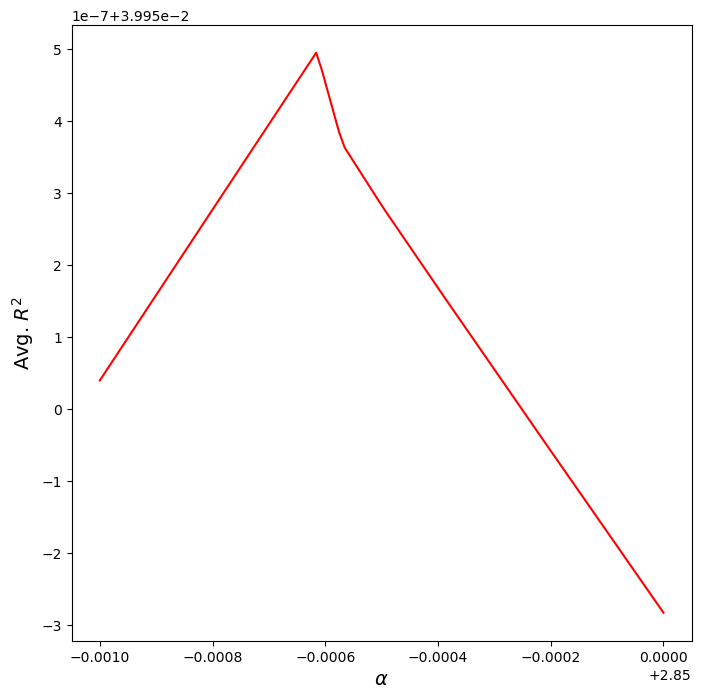

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
#plt.legend()
plt.show()

In [40]:
idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

Optimal alpha in the range tested:  2.8493838383838384
Avg. training score at this value:  0.14128796825092405
Avg. testing score at this value:  0.03995049459748727


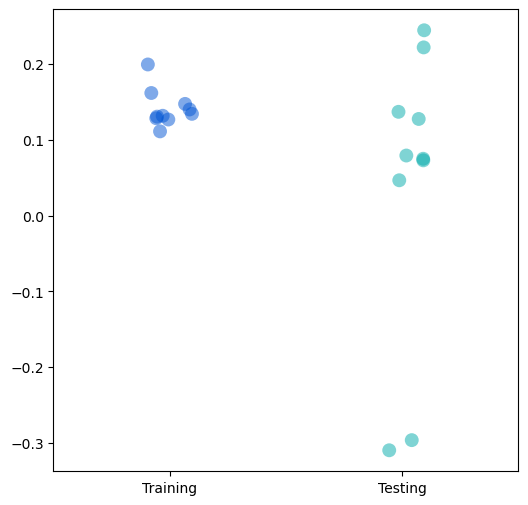

In [41]:
plt.figure(figsize = (6,6))
sns.stripplot(data = pd.DataFrame(zip(train_scores,test_scores), columns = ['Training', 'Testing']), size=10, palette = 'winter',
             alpha = 0.5, jitter = True)
plt.show()

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [42]:
#build a model with ALL of the data
#create the Regressor
#use the optimal value of alpha you found above
las_reg = Lasso(alpha=2.8493793793793794)

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [43]:
#do the appropriate scaling
#fit and score the lasso regression
ss = SS()
X_scaled = ss.fit_transform(X)
las_reg.fit(X_scaled, y)
las_reg.score(X_scaled, y)

0.1363256900512284

In [44]:
X

array([[ 75.,   0., 190., ...,  64.,  -2.,  63.],
       [ 56.,   1., 165., ..., -17.,  31.,  53.],
       [ 54.,   0., 172., ...,  70.,  66.,  75.],
       ...,
       [ 36.,   0., 166., ..., -61., -70.,  84.],
       [ 32.,   1., 155., ..., -22.,  43.,  80.],
       [ 78.,   1., 160., ...,  52.,  47.,  75.]])

In [45]:
X_scaled

array([[ 1.78461458, -1.12771412,  2.50625562, ...,  0.50332343,
        -1.06228483, -0.87087199],
       [ 0.60448061,  0.88674956,  0.12984956, ..., -2.31532108,
        -0.15096218, -1.65574585],
       [ 0.48025598, -1.12771412,  0.79524326, ...,  0.71211191,
         0.81559216,  0.07097663],
       ...,
       [-0.63776568, -1.12771412,  0.2249058 , ..., -3.84643662,
        -2.94016182,  0.7773631 ],
       [-0.88621493,  0.88674956, -0.82071287, ..., -2.48931149,
         0.18042788,  0.46341356],
       [ 1.97095152,  0.88674956, -0.34543166, ...,  0.08574647,
         0.29089123,  0.07097663]])

In [46]:
pd.Series(las_reg.coef_, index = part_one_new.drop(columns = ['T_angle']).columns)
#Which features go set to 0?

Age            0.248715
Sex           -4.774774
Height         0.000000
Weight        -0.000000
QRS           -0.000000
PR            -0.000000
QT             4.505144
T_wave         0.000000
P_wave         0.000000
QRS_angle    -11.410870
P_angle       -0.000000
QRST_angle    17.970263
Heart_Rate     0.000000
dtype: float64

In [47]:
missing_T

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia
63,54,1,160,63,82,158,410,141,87,25,NaN,62.0,39.0,54.0,2
88,64,1,155,88,82,194,342,138,126,-4,NaN,64.0,-1.0,85.0,4
190,70,1,160,90,76,187,396,155,121,-1,NaN,30.0,2.0,89.0,2
201,63,0,174,79,91,151,410,198,86,16,NaN,2.0,16.0,59.0,2
225,56,0,170,80,81,162,352,154,100,23,NaN,56.0,20.0,79.0,1
337,62,1,157,65,81,174,452,160,116,53,NaN,42.0,53.0,87.0,2
349,48,0,182,77,77,196,325,235,104,46,NaN,56.0,44.0,89.0,2
389,41,0,170,67,96,191,368,202,108,62,NaN,-52.0,62.0,63.0,16


In [48]:
#Now we will use the model to predict our missing values
for_pred = missing_T.drop(columns = ['T_angle', 'arrhythmia']).values
for_pred

array([[ 54.,   1., 160.,  63.,  82., 158., 410., 141.,  87.,  25.,  62.,
         39.,  54.],
       [ 64.,   1., 155.,  88.,  82., 194., 342., 138., 126.,  -4.,  64.,
         -1.,  85.],
       [ 70.,   1., 160.,  90.,  76., 187., 396., 155., 121.,  -1.,  30.,
          2.,  89.],
       [ 63.,   0., 174.,  79.,  91., 151., 410., 198.,  86.,  16.,   2.,
         16.,  59.],
       [ 56.,   0., 170.,  80.,  81., 162., 352., 154., 100.,  23.,  56.,
         20.,  79.],
       [ 62.,   1., 157.,  65.,  81., 174., 452., 160., 116.,  53.,  42.,
         53.,  87.],
       [ 48.,   0., 182.,  77.,  77., 196., 325., 235., 104.,  46.,  56.,
         44.,  89.],
       [ 41.,   0., 170.,  67.,  96., 191., 368., 202., 108.,  62., -52.,
         62.,  63.]])

In [49]:
las_reg.predict(ss.transform(for_pred))

array([43.62642862, 21.53174633, 30.00263905, 44.20979304, 36.14301246,
       49.66858876, 38.38784506, 49.31113148])

The next code cell fills in this value for the NaN in the observation.

In [50]:
missing_T['T_angle'] = las_reg.predict(ss.transform(for_pred))

In [51]:
########################### Q7 ###############################################################
# Find the optimal value for alpha based on the R2 values as indicated in the code. What is the 
# optimal value of alpha?

# Note that the range given is 0.5 to 1.5. If you need to adjust the range upward, use 1.5 to 2.5,
# then 2.5 to 3.5 and so forth. Your answer being correct depends on following this convention.

# Round your answer to 2 decimal places.

2.8493793793793794
2.85

2.85

In [52]:
########################### Q8 ###############################################################
# We are performing Lasso regression to create a model to predict T_angle. Based on the results of hyperparameter 
# optimization and the ultimate model building and subsequent prediction, select the options below that apply.

In [53]:
# True # Based on the Lasso results, the feature with the largest coefficient, in terms of magnitude, is QRST_angle
## QRST_angle    17.970263

In [54]:
# False # The model score reported when we put all of the data in the model indicates an accuracy value of approximately 13.4%
## It returns the coefficient of determination, not the accuracy

In [55]:
# False # Lasso regression removes 3 features from the model
## 7 variables now have 0.0 as their coefficients so it removes 7, not 3.

In [56]:
# True # For some of the test data sets used in k-fold validation, the model created performed worse than the null model
## If you look above and see the test scores for each model created in do_Kfold, you can see some negative values.

In [57]:
# False # The average training and testing scores (from the hyperparameter optimization) for the optimal value of alpha were 
# approximately the same with the training score only slightly higher (less than 1% difference)
## If you look at the numbers below the red line graph above, the scores are far apart (about 78% change)

In [58]:
# True # If we had just used the null model, as we defined the null model in class, we would have predicted T_angle for the 
# missing observations as approximately 38.6 (the approximately is not a trick...if the number resembles 38.6 in some 
# way this is correct, if it doesn't, this is not correct)
part_one_new['T_angle'].mean()
## You use the mean of the data for the null model, so this is correct

38.600478468899524

# Let's do some classification

We will use the part_two data set we made at the beginning for classification. There is some code added here to add the observations we just imputed T_angle for to the part_two data set. You can just run it as is. You should end up with 428 observations total.

In [59]:
missing_T['dicot'] =  missing_T['arrhythmia'].apply(lambda x: 0 if x==1 else 1)
missing_T

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia,dicot
63,54,1,160,63,82,158,410,141,87,25,43.626429,62.0,39.0,54.0,2,1
88,64,1,155,88,82,194,342,138,126,-4,21.531746,64.0,-1.0,85.0,4,1
190,70,1,160,90,76,187,396,155,121,-1,30.002639,30.0,2.0,89.0,2,1
201,63,0,174,79,91,151,410,198,86,16,44.209793,2.0,16.0,59.0,2,1
225,56,0,170,80,81,162,352,154,100,23,36.143012,56.0,20.0,79.0,1,0
337,62,1,157,65,81,174,452,160,116,53,49.668589,42.0,53.0,87.0,2,1
349,48,0,182,77,77,196,325,235,104,46,38.387845,56.0,44.0,89.0,2,1
389,41,0,170,67,96,191,368,202,108,62,49.311131,-52.0,62.0,63.0,16,1


In [60]:
part_two.head()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia,dicot
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,8,1
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,6,1
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,10,1
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,1,0
4,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,84.0,14,1


In [61]:
part_two = pd.concat([part_two, missing_T]).reset_index(drop = True)

In [62]:
part_two['dicot'].value_counts()

dicot
0    238
1    190
Name: count, dtype: int64

In [63]:
part_two.isnull().sum()

Age           0
Sex           0
Height        0
Weight        0
QRS           0
PR            0
QT            0
T_wave        0
P_wave        0
QRS_angle     0
T_angle       0
P_angle       0
QRST_angle    0
Heart_Rate    0
arrhythmia    0
dicot         0
dtype: int64

In [64]:
part_two.shape[0]

428

In [65]:
missing_T

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia,dicot
63,54,1,160,63,82,158,410,141,87,25,43.626429,62.0,39.0,54.0,2,1
88,64,1,155,88,82,194,342,138,126,-4,21.531746,64.0,-1.0,85.0,4,1
190,70,1,160,90,76,187,396,155,121,-1,30.002639,30.0,2.0,89.0,2,1
201,63,0,174,79,91,151,410,198,86,16,44.209793,2.0,16.0,59.0,2,1
225,56,0,170,80,81,162,352,154,100,23,36.143012,56.0,20.0,79.0,1,0
337,62,1,157,65,81,174,452,160,116,53,49.668589,42.0,53.0,87.0,2,1
349,48,0,182,77,77,196,325,235,104,46,38.387845,56.0,44.0,89.0,2,1
389,41,0,170,67,96,191,368,202,108,62,49.311131,-52.0,62.0,63.0,16,1


In [66]:
########################### Q9 ###############################################################
# The code to predict the missing values of T_angle and update them in the data frame was given to you. 
# Based on this code, which of the following statements describes how scaling was performed on the observations 
# that had missing values?


In [67]:
# False # The values in these observations were not scaled

In [68]:
# False # The values in these observations were scaled according their own mean and standard deviation 
# (i.e. means and standard deviations calculated only from the observations missing T_angle)

In [69]:
# False # The values in these observations were scaled according to the mean and standard deviation of the 
# training data set used in k-fold validation

In [70]:
# True # The values in these observations were scaled according to the mean and standard deviation of the 
# full data set that had no missing values for T_angle

## You scaled, fitting X, and y, which make up the full data set without missing values (part_one_new), 
# then transform the missing predictions

### PCA and tSNE

First, we will do PCA and tSNE just to look at the data.<br>

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Question 10 based on this section</span>

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
for_pca = part_two.drop(columns = ['arrhythmia', 'dicot'])
#do the PCA, be sure to scale the data
ss = SS()

pca_X = ss.fit_transform(for_pca)
pca.fit(pca_X, y)
pca.explained_variance_ratio_

array([0.18032807, 0.12894799, 0.11715359, 0.10749046, 0.0779777 ,
       0.07617244, 0.06814002, 0.05443477, 0.05122788, 0.03998314,
       0.0356733 , 0.03042657, 0.01682184, 0.01522224])

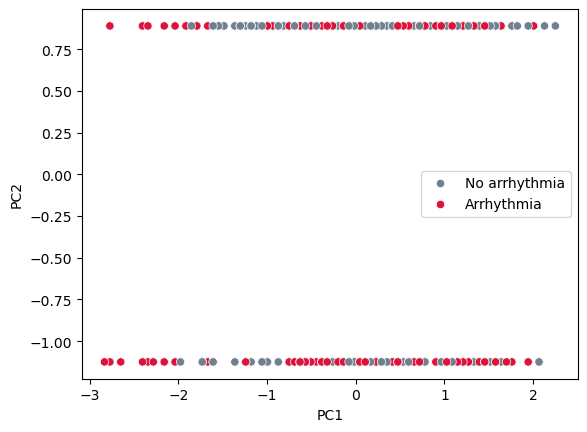

In [72]:
#plot PCA results
pca_df = pd.DataFrame(pca_X[:,:2], columns  = ['PC1','PC2'])
pca_df['target'] = part_two['dicot']
ax = sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = 'target', palette = ['slategrey','crimson'])
plt.legend(ax.get_legend_handles_labels()[0], ['No arrhythmia', 'Arrhythmia'])
plt.show()

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [73]:
from sklearn.manifold import TSNE
#perform the tSNE with default perplexity and random_state 42

tsne = TSNE(random_state = 42)
ss = SS()
tsne_X = ss.fit_transform(X)
tsne.fit(X, y)

TSNE(random_state=42)

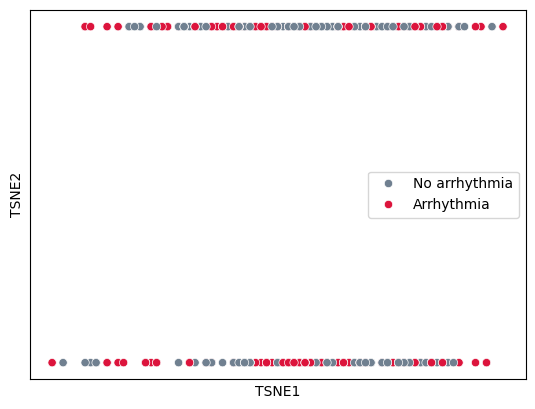

In [74]:
tsne_df = pd.DataFrame(tsne_X[:,:2], columns  = ['TSNE1','TSNE2'])
tsne_df['target'] = part_two['dicot']
ax = sns.scatterplot(data = tsne_df, x = 'TSNE1', y = 'TSNE2', hue = 'target', palette = ['slategrey','crimson'])
plt.legend(ax.get_legend_handles_labels()[0], ['No arrhythmia', 'Arrhythmia'])
plt.xticks([])
plt.yticks([])
plt.show()

## Classification

We will fit a variety of classifiers on a single tts to see how they perform. For the KNN and RFC, we will optimize hyperparameters.

In [75]:
X = part_two.drop(columns = ['arrhythmia', 'dicot']).values
X_names = part_two.drop(columns = ['arrhythmia', 'dicot']).columns
y = part_two['dicot'].values

In [76]:
########################### Q10 ###############################################################

In [77]:
# Look at the plots generated by the PCA and the tSNE (and yes, this will still work even if your tSNE plot has a slightly different 
# orientation). Which statement below best describes what we see?

# True # We can plot the tSNE points without shading them in and the positions of the points will not change

### KNN Hyperparameter Optimization

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Question 11 based on this section</span>

In [78]:
from sklearn.neighbors import KNeighborsClassifier as KNN
neighbor_range = np.array(range(2,13))

train=[]
test=[]

k = 50

for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors=n_neighbors, weights = 'distance')
    tr,te = do_Kfold(knn,X,y,k, SS())
    
    train.append(np.mean(tr))
    test.append(np.mean(te))


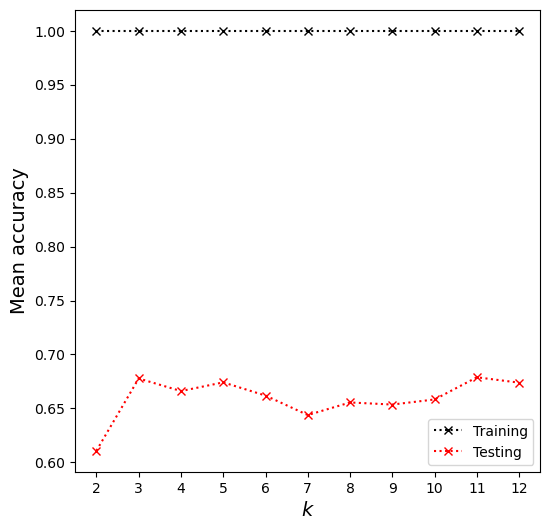

In [79]:
plt.figure(figsize=(6,6))
plt.plot(neighbor_range, train, ':xk', label='Training')
plt.plot(neighbor_range, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

In [80]:
idx = np.argmax(test)
print(idx)
print(neighbor_range[idx])
print(np.max(test))
print(np.max(train))

9
11
0.6788888888888889
1.0


In [81]:
########################### Q11 ###############################################################

In [82]:
# You have been given the code to optimize the number of neighbors for KNN. Use the code given to do this - do not change any of the 
# parameters used. Based on your understanding of this code, which of the following statements gives the correct optimized parameters? 
# You will need to use these moving forward.

### KNN vs Logistic Regression one tts

We will now create a train test split that we will use to compare all of our classifiers. We will start by comparing KNN and Logistic Regression. <br><br>
<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Question 12 based on this comparison, be sure you are using the single tts created below</span>

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [83]:
#one tts
from sklearn.model_selection import train_test_split as tts
Xtrain, Xtest, ytrain, ytest = tts(X,y,random_state = 201, shuffle = True, test_size = 0.2)
ss = SS()
#scale the testing and training data appropriately
XtrainS = ss.fit_transform(Xtrain)
XtestS = ss.transform(Xtest)

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [84]:
#Use the number of neighbors determined above and the weighting scheme used for the optimization
#fit the KNN classifier and score it on train
knn = KNN(n_neighbors = 11, weights = 'distance')
knn.fit(XtrainS, ytrain)
knn.score(XtrainS, ytrain)

1.0

In [85]:
knn.score(XtestS, ytest)

0.6511627906976745

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [86]:
#Generate a confusion matrix for the scaled test data
compare_classes(ytest, knn.predict(XtestS))

Accuracy = 0.65


(Predicted   0   1
 Actual           
 0          41   6
 1          24  15,
 0.6511627906976745)

### Logistic regression

We won't tune the hyperparameter here.

In [87]:
#Let's try logistic regression
from sklearn.linear_model import LogisticRegression as LogR

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [88]:
#perform logistic regression on the scaled training data and score on train and test
log_reg = LogR()
log_reg.fit(XtrainS, ytrain)
print("The training score is", log_reg.score(XtrainS, ytrain))
print("The testing score is", log_reg.score(XtestS, ytest))

The training score is 0.695906432748538
The testing score is 0.7093023255813954


<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [89]:
#Generate a confusion matrix for the scaled test data
compare_classes(ytest, log_reg.predict(XtestS))

Accuracy = 0.71


(Predicted   0   1
 Actual           
 0          39   8
 1          17  22,
 0.7093023255813954)

In [90]:
########################### Q12 ###############################################################

In [91]:
# This question refers to the classification task to classify individuals with and without arrhythmias using all predictors. 
# We are comparing KNN and Logistic Regression on a single train test split. Based on your results, which statement applies?

In [92]:
# False # The recall for class 0 (no arrhythmia) was higher for Logistic Regression than for KNN

print("The recall for class 0 for KNN is ", (41)/(41+6))
print("The recall for class 0 for Logistic Regression is ", (39)/(39+8))

## Logistic regression recall is not higher as shown below

The recall for class 0 for KNN is  0.8723404255319149
The recall for class 0 for Logistic Regression is  0.8297872340425532


In [93]:
# Logistic Regression achieved a higher score (consider out to 4 decimal places) on the testing data but not the training data

# True #

In [94]:
# Based on recall, both classifiers are better at predicting class 1 than class 0 (i.e. each classifier compared to itself for both classes)

# False #

In [95]:
# If we had to pick which classifier to move forward with the same way we did in class based on this data alone, we would choose 
# the KNN classifier

# False #

### Random Forest Classifier

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 13, 14, and 15 based on this section</span>

We will use the grid search to optimize a few hyperparameters for our RFC before we try it out on the train test split. We will look at a hyperparameter we haven't seen before: max_leaf_nodes - this limits the number of leaves each decision tree can have.

In [96]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import KFold, GridSearchCV

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [97]:
#Create a gridsearchCV to test 100,500,1000 trees and min_samples_split of 20,30,40
param_grid = dict(n_estimators=[100,500,1000], min_samples_split = [20,30,40])
#use 10 folds
cv = KFold(n_splits=10, random_state=201, shuffle = True)
grid = GridSearchCV(RFC(random_state=201), param_grid=param_grid, cv=cv, 
                    scoring='accuracy')
#create the gridsearchCV object, score on accuracy
#fit the gridsearch
grid.fit(XtrainS, ytrain)
grid.score(XtestS, ytest)

0.7906976744186046

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [98]:
#Look at the gridsearch results - be sure to look at the parameter values 
#as well as the mean test scores and their ranks
print(f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}')
results = pd.DataFrame(grid.cv_results_)[['param_n_estimators',
                                'param_min_samples_split','mean_test_score','rank_test_score']]

The best parameters are {'min_samples_split': 30, 'n_estimators': 1000} with a score of 0.75


In [99]:
results

,param_n_estimators,param_min_samples_split,mean_test_score,rank_test_score
0,100,20,0.742689,8
1,500,20,0.751513,2
2,1000,20,0.751513,2
3,100,30,0.742773,7
4,500,30,0.748487,6
5,1000,30,0.751597,1
6,100,40,0.731092,9
7,500,40,0.748571,5
8,1000,40,0.748655,4


In [100]:
results[results['rank_test_score'] == 1]

,param_n_estimators,param_min_samples_split,mean_test_score,rank_test_score
5,1000,30,0.751597,1


Select the optimal parameters from the grid search. In the case of ties, use the value that results in a less complex classifier - for example if max_leaf_nodes were tied at 10 and 15, we would use 10 (that prunes the tree more). You should ask for help if you don't understand how the hyperparameters constrain the tree. 

<span style="color:red;font-size:large">You have to fill something in in the next three code cells</span>

In [101]:
#create the rfc using the optimal parameters defined above and random_state 201
rfc = RFC(min_samples_split=30, n_estimators=1000, random_state = 201)

In [102]:
#fit the rfc
rfc.fit(XtrainS, ytrain)

RandomForestClassifier(min_samples_split=30, n_estimators=1000,
                       random_state=201)

In [103]:
#score on the training and testing data from the single tts we made above
print(rfc.score(XtrainS, ytrain))
print(rfc.score(XtestS, ytest))

0.8742690058479532
0.7906976744186046


In [104]:
# Dont need to scale

<span style="color:red;font-size:large">You have to fill something in in the next two code cells</span>

In [105]:
#Generate the confusion matrix for the training data
compare_classes(ytrain, rfc.predict(XtrainS))

Accuracy = 0.87


(Predicted    0    1
 Actual             
 0          176   15
 1           28  123,
 0.8742690058479532)

In [106]:
#Generate the confusion matrix for the test data
compare_classes(ytest, rfc.predict(XtestS))

Accuracy = 0.79


(Predicted   0   1
 Actual           
 0          39   8
 1          10  29,
 0.7906976744186046)

In [107]:
########################### Q13 ###############################################################

# Use only the hyperparameters tested, and use computational complexity to break a tie for the number of trees, i.e. 
# we want less complexity and what constrains individual trees more for tree hyperparameters - pick what constrains more. 
# Use random_state 201 wherever a random state can be used.

# The grid search for the optimal hyperparameters for the RFC gives the following results:


## Simply looked at the optimal values

In [108]:
# Number of estimators: 

# 1000 #

## Look above

In [109]:
# Minimum number of samples to split a node: 
                                               
# 30 #

## Look above too

In [110]:
# This gives an average testing score (rounded to three decimal places) of: 
                                               
results['mean_test_score'][5]

## The mean_test_score with the rank_test_score = 1

0.7515966386554622

In [111]:
# There were 

# 1 #

# sets of results with the same average testing score given above for the last answer

In [112]:
########################### Q14 ###############################################################

In [113]:
# Use the RFC with optimized parameters for this question and random state 201

# For the testing data, the precision for those without arrhythmias is:

print("The precision for class 0 for rfc is ", (39)/(39+10))



The precision for class 0 for rfc is  0.7959183673469388


In [114]:
########################### Q15 ###############################################################

In [115]:
# Based on the results from the RFC with the optimized parameters (random_state 201), we can determine the following:

In [116]:
# True # On the training data, based on overall accuracy, the RFC performs better than our Logistic Regression but worse than our KNN


In [117]:
# True # Between the 3 classifiers we tested on the single tts, we would choose the RFC based on the way we selected models in class

## Testing scores are higher for both and training is higher than log_reg. The model is also not overfit


In [118]:
# False # The Logistic Regression has a higher testing accuracy than the RFC

## Like found in the last answer above, RFC had the higher testing accuracy


In [119]:
# True # There are more individuals without arrhythmias in the test data for the RFC

## Look at the actuals in the confusion matrix above

In [120]:
# False # The RFC has a higher training accuracy than both the KNN and the Logistic Regression

## As seen above, the training score for KNN is 1.0, and that is the highest, so this is False